In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_excel(r"D:/Kaggle datasets/retail_store_sales.xlsx")

In [11]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,1.0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,1.0
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,0.0
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,0.0
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,0.0
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,1.0


In [12]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

In [14]:
df.describe()

,Price Per Unit,Quantity,Total Spent,Transaction Date,Discount Applied
count,11966.000000,11971.000000,11971.000000,12575,8376.000000
mean,23.365912,5.536380,129.652577,2023-07-12 20:23:41.105368064,0.503701
min,5.000000,1.000000,5.000000,2022-01-01 00:00:00,0.000000
25%,14.000000,3.000000,51.000000,2022-09-30 00:00:00,0.000000
50%,23.000000,6.000000,108.500000,2023-07-13 00:00:00,1.000000
75%,33.500000,8.000000,192.000000,2024-04-24 00:00:00,1.000000
max,41.000000,10.000000,410.000000,2025-01-18 00:00:00,1.000000
std,10.743519,2.857883,94.750697,NaN,0.500016


In [46]:
df["Discount Applied"].dtype


dtype('float64')

In [49]:
import numpy as np
df["Discount Applied"].replace(['NULL', 'Na', ''], np.nan)


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12570   NaN
12571   NaN
12572   NaN
12573   NaN
12574   NaN
Name: Discount Applied, Length: 12575, dtype: float64

In [54]:
print(df.columns.tolist())


['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit', 'Quantity', 'Total Spent', 'Payment Method', 'Location', 'Transaction Date', 'Discount Applied']


In [55]:
import numpy as np
import pandas as pd

# Sab possible null-like values ko NaN mein convert karein
df['Item'] = df['Item'].replace(
    [None, '', ' ', 'NULL', 'Na', 'na', 'nan', 'None'], np.nan
)

# Ab mode nikaalein (most frequent non-null value)
mode_val = df['Item'].mode().iloc[0]   # sabse common value

# Nulls ko mode se fill karein
df['Item'] = df['Item'].fillna(mode_val)

# Check karein ab kitni NaN hain
print(df['Item'].isnull().sum())


0


In [56]:
df["Item"].fillna(df["Item"].mode())

0         Item_10_PAT
1        Item_17_MILK
2         Item_12_BUT
3         Item_16_BEV
4         Item_6_FOOD
             ...     
12570     Item_23_PAT
12571      Item_2_BEV
12572      Item_7_BUT
12573      Item_7_FUR
12574     Item_9_FOOD
Name: Item, Length: 12575, dtype: object

In [57]:
df.isnull().sum()

Transaction ID          0
Customer ID             0
Category                0
Item                    0
Price Per Unit        609
Quantity              604
Total Spent           604
Payment Method          0
Location                0
Transaction Date        0
Discount Applied    12575
dtype: int64

In [58]:
df["Price Per Unit"].fillna(df["Price Per Unit"].mean())

0        18.5
1        29.0
2        21.5
3        27.5
4        12.5
         ... 
12570    38.0
12571     6.5
12572    14.0
12573    14.0
12574    17.0
Name: Price Per Unit, Length: 12575, dtype: float64

In [59]:
df["Quantity"].fillna(df["Quantity"].mean())
df["Total Spent"].fillna(df["Total Spent"].mean())


0        185.0
1        261.0
2         43.0
3        247.5
4         87.5
         ...  
12570    152.0
12571     58.5
12572    140.0
12573     84.0
12574     51.0
Name: Total Spent, Length: 12575, dtype: float64

In [60]:
df.isnull().sum()

Transaction ID          0
Customer ID             0
Category                0
Item                    0
Price Per Unit        609
Quantity              604
Total Spent           604
Payment Method          0
Location                0
Transaction Date        0
Discount Applied    12575
dtype: int64

In [61]:
# sab column names strip kar do (start aur end spaces remove)
df.columns = df.columns.str.strip()



In [62]:
import numpy as np

null_like_values = [None, '', ' ', 'NULL', 'Na', 'na', 'nan', 'None', '--']

df = df.replace(null_like_values, np.nan)


In [63]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        # numeric column → fill with mean
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].mean())
    else:
        # non-numeric (object / string) column → fill with mode
        mode_val = df[col].mode(dropna=True)
        if not mode_val.empty:
            df[col] = df[col].fillna(mode_val.iloc[0])


In [68]:
print(df.loc[df['Discount Applied'].isna(), 'Discount Applied'])


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12570   NaN
12571   NaN
12572   NaN
12573   NaN
12574   NaN
Name: Discount Applied, Length: 12575, dtype: float64


In [69]:
import numpy as np
import pandas as pd

# 1. Har tarah ki 'fake null' ko NaN karo
null_like_values = [None, '', ' ', 'NULL', 'Na', 'na', 'nan', 'None', '--']
df['Discount Applied'] = df['Discount Applied'].replace(null_like_values, np.nan)

# 2. Column ko numeric force karo
df['Discount Applied'] = pd.to_numeric(df['Discount Applied'], errors='coerce')


In [71]:
mean_val = df['Discount Applied'].mean(skipna=True)

# Agar mean calculate nahi ho raha (sab NaN hain) to mode use karo:
if pd.isna(mean_val):
    mode_val = df['Discount Applied'].mode(dropna=True)
    if not mode_val.empty:
        fill_val = mode_val.iloc[0]
    else:
        fill_val = 0  # fallback
else:
    fill_val = mean_val

df['Discount Applied'] = df['Discount Applied'].fillna(fill_val)


In [72]:
df.duplicated().sum()

0

In [73]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

In [74]:
import numpy as np
import pandas as pd

# 1️⃣ Sirf numeric columns choose karo
numeric_cols = df.select_dtypes(include=[np.number]).columns

# 2️⃣ DataFrame banayenge jisme har column ka lower & upper bound + outlier count ho
outlier_summary = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    outlier_summary.append({
        'Column': col,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outlier_Count': outlier_count
    })

outlier_df = pd.DataFrame(outlier_summary)
print("🔎 Outlier Summary:")
print(outlier_df)


🔎 Outlier Summary:
             Column  Lower_Bound  Upper_Bound  Outlier_Count
0    Price Per Unit        -13.0         59.0              0
1          Quantity         -4.5         15.5              0
2       Total Spent       -138.5        377.5            157
3  Discount Applied          0.0          0.0              0


In [75]:
# Ek copy bana lete hain (optional)
df_clean = df.copy()

# Har numeric column ke liye filter lagate hain
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Sirf wohi rows rakho jo bounds ke andar hain
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("✅ Outliers removed. Clean dataset shape:", df_clean.shape)


✅ Outliers removed. Clean dataset shape: (12418, 11)


In [78]:
df.to_excel("D:/Kaggle datasets/clean_retail_store_sales.xlsx",index = False)

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_excel("D:/Kaggle datasets/clean_retail_store_sales.xlsx")

In [82]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,0
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,0
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,0
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,0
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,0
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,0
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,0
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,0


In [83]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

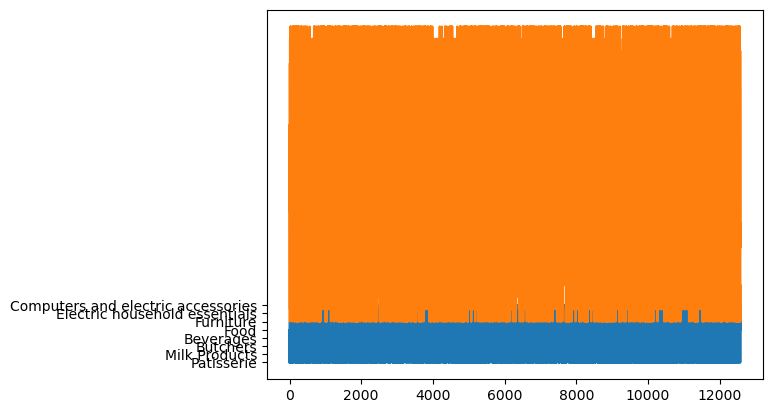

In [88]:
plt.plot (df["Category"],label = "Category")
plt.plot (df["Price Per Unit"],label = "Price Per Unit")

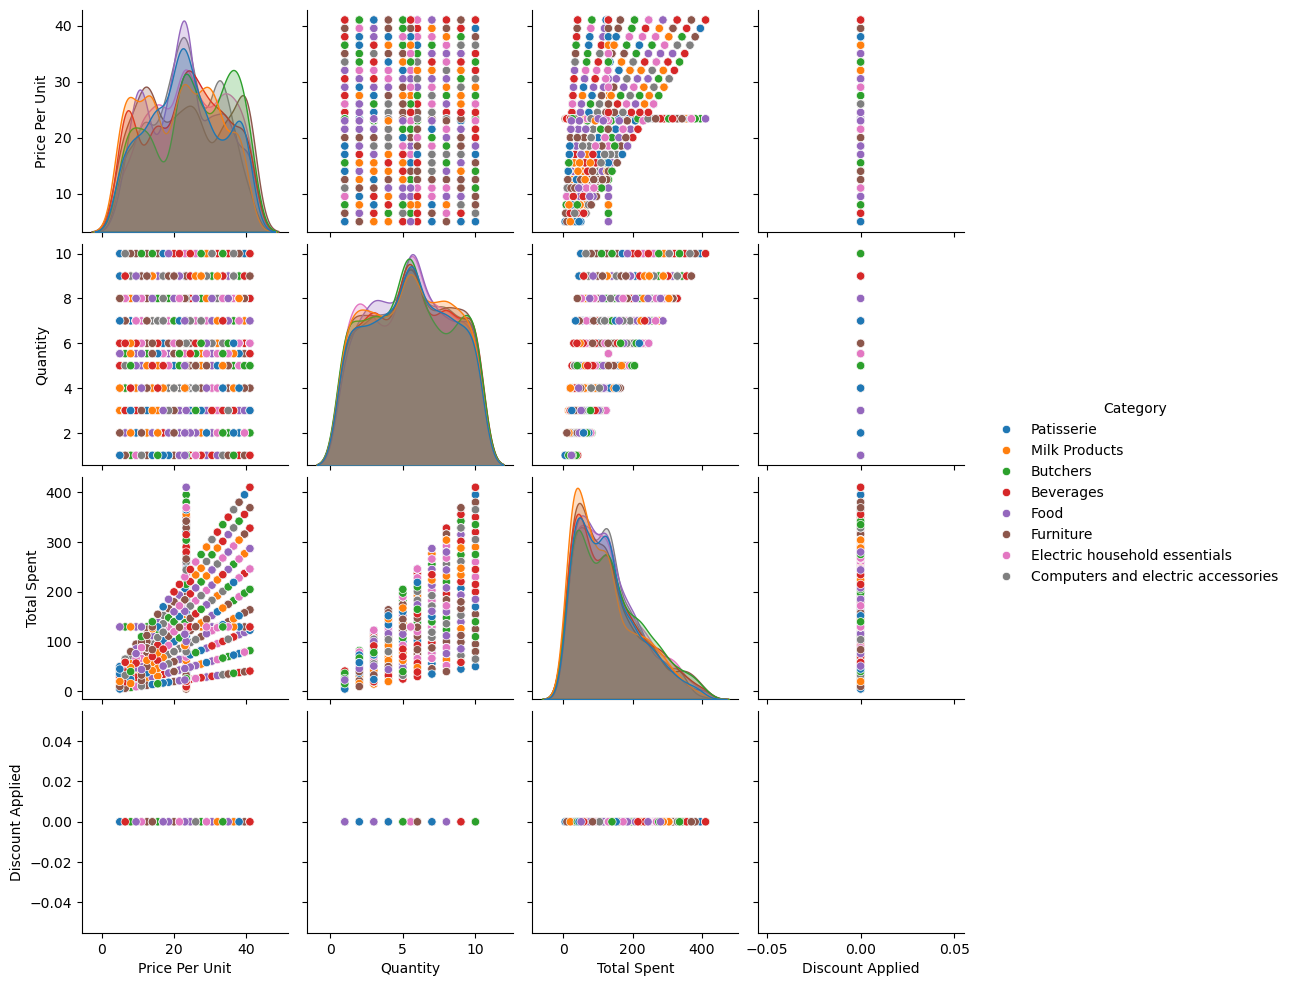

In [91]:
sns.pairplot(df,hue ="Category" )
plt.show()

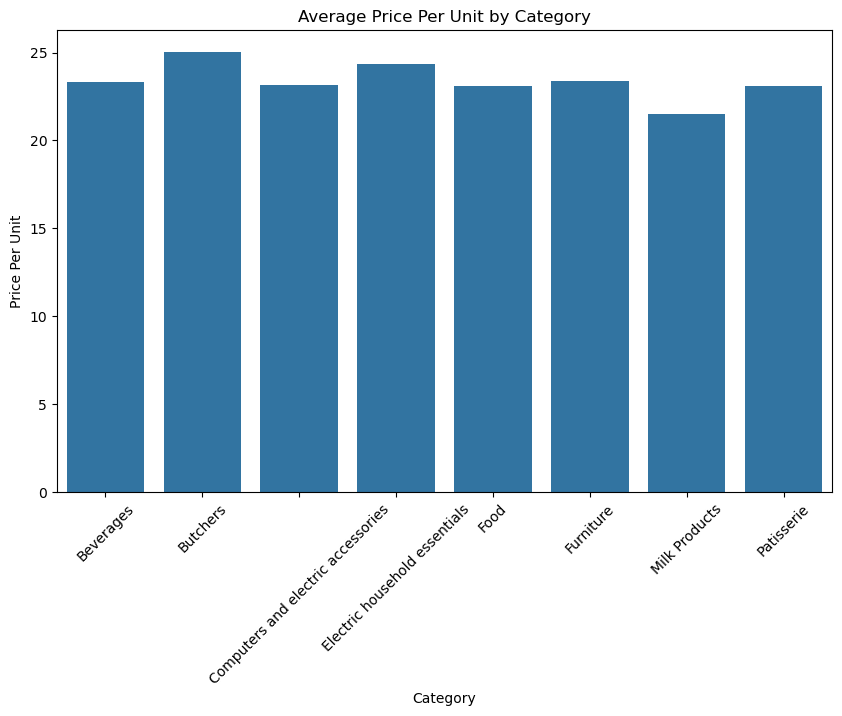

In [92]:
agg_df = df.groupby('Category')['Price Per Unit'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Price Per Unit', data=agg_df)
plt.xticks(rotation=45)
plt.title('Average Price Per Unit by Category')
plt.show()

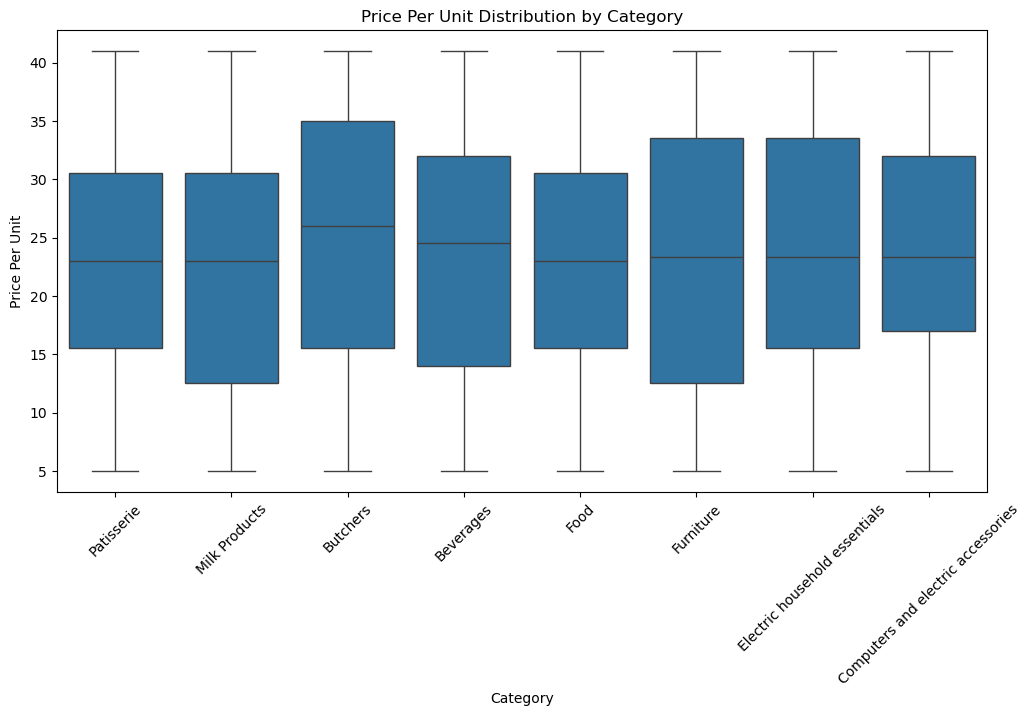

In [93]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Price Per Unit', data=df)
plt.xticks(rotation=45)
plt.title('Price Per Unit Distribution by Category')
plt.show()


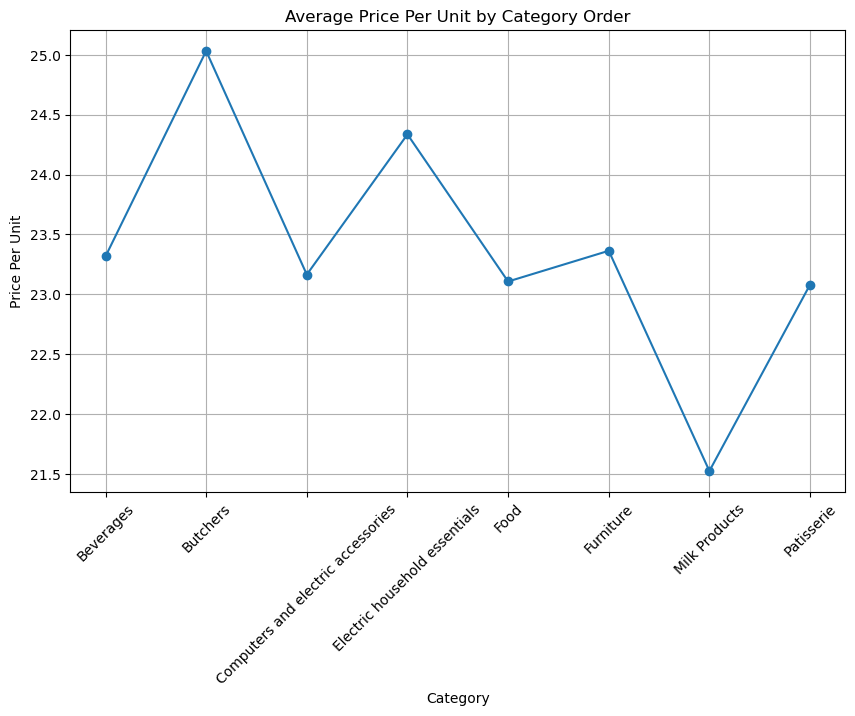

In [94]:
agg_df = df.groupby('Category')['Price Per Unit'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(agg_df['Category'], agg_df['Price Per Unit'], marker='o')
plt.title('Average Price Per Unit by Category Order')
plt.xlabel('Category')
plt.ylabel('Price Per Unit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
